# Simple Linear Regression Exercise

In this notebook you will implement a linear regression model in Python. 

**Objectives**  
At the end of the notebook you should be able to:
- define the relationship between two variables
- define the concepts of intercept and slope
- reproduce the equation of Linear Regression
- explain the concept behind OLS
- build a Linear Regression model with the statsmodels module in Python
- interpret the output of a Linear Regression model built with the statsmodels module

**Task 1**  

The scatterplots below show the relationship between height, diameter and volume of timber in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.   

<img src="images/lin_reg_ex_1.png" width="600">  

(a) Describe the relationship between volume and height of these trees.  

* linear regression
* directly proportional
* positive correlation
* but not that clear, because at higher height we have many outliers

(b) Describe the relationship between volume and diameter of these trees.  

* linear regression
* directly proportional
* positive correlation

(c) Suppose you have height and diameter measurements for another black cherry tree. Which of these variables would be preferable to use to predict the volume of timber in this tree using a simple linear regression model? Explain your reasoning.

* **diameter** seems to be more directly proportional to volume than height is
* the points are closer to each other than in the plot with volume and height

**Task 2**  
Let's look at a dataset which is about Car seats. It includes the sales of child car seats at 400 different stores.
<center><img src="https://www.kids-room.com/WebRoot/KidsroomDE/Shops/Kidsroom/57F5/A89B/58DB/FDD9/0EE3/4DEB/AE1C/9842/BILD3_79159-103708_ml.jpg?ts=1621453494" height="300"/></center>  

You can find the data in the data folder ('data/Carseats.csv').

It contains 400 observations for 400 different stores on the following 11 variables:

```
Sales:         Unit sales (in thousands) at each location
CompPrice:     Price charged by competitor at each location
Income:        Community income level (in thousands of dollars)
Advertising:   Local advertising budget for company at each location (in thousands of dollars)
Population:    Population size in region (in thousands)
Price:         Price company charges for car seats at each site
ShelveLoc:     A factor with levels Bad, Good and Medium indicating the quality of the shelving location
for the car seats at each site
Age:           Average age of the local population
Education:     Education level at each location
Urban:         A factor with levels No and Yes to indicate whether the store is in an urban or rural location
US:            A factor with levels No and Yes to indicate whether the store is in the US or not
```

-----
**Task**  
A company that makes these carseats want to predict their sales -  based on different factors. 

As you may see, there a many variables which you could include to help the company in predicting their sales. However, at this point we want to focus on one variable.  
**Your task is, to use the variable price as independent variable to predict price.**


Import all necessary libraries and read in the data:

In [1]:
import pandas as pd
import statsmodels.api as sms
import seaborn as sns
import matplotlib.pyplot as plt

1. Read in carseats data and get an overview of the data.

In [2]:
carseats_df = pd.read_csv('data/Carseats.csv')
carseats_df.columns = [c.lower() for c in carseats_df.columns]

In [3]:
carseats_df.sample(10)

,sales,compprice,income,advertising,population,price,shelveloc,age,education,urban,us
45,4.56,141,63,0,168,135,Bad,44,12,Yes,Yes
393,5.57,109,51,10,26,120,Medium,30,17,No,Yes
244,8.78,130,30,0,391,100,Medium,26,18,Yes,No
161,2.93,143,21,5,81,160,Medium,67,12,No,Yes
236,9.32,141,34,16,361,108,Medium,69,10,Yes,Yes
49,10.61,157,93,0,51,149,Good,32,17,Yes,No
259,5.12,123,36,10,467,100,Bad,74,11,No,Yes
208,7.78,86,54,0,497,64,Bad,33,12,Yes,No
299,9.40,135,40,17,497,96,Medium,54,17,No,Yes
325,11.70,144,69,11,131,104,Medium,47,11,Yes,Yes


2.a) Create scatterplot showing the relationship between price and Sales.


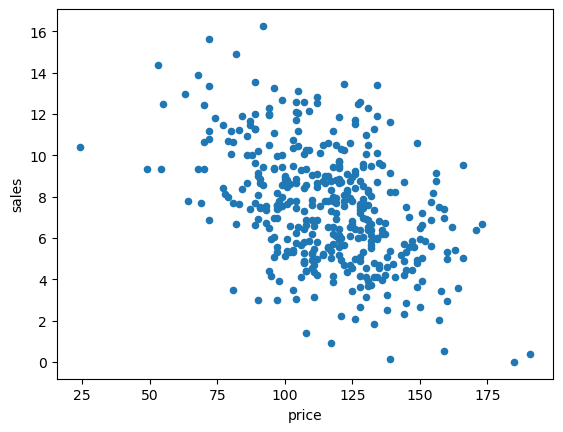

In [4]:
carseats_df.plot(x='price', y='sales', kind = 'scatter');

2.b) From visual inspection, what is the relationship between the variables?

* it seems like a direct, negative correlation

2.c) Which other variables could explain variance in sales? Plot them against sales.
<br>
<details><summary>
Click here for a suggestion on how to easily vizualise:
</summary>
... there is a seaborn plot called pairplot, syntax: sns.pairplot(data)
</details>


* **comp**etition **price**
* average **income** of the region
* **advertising**
* **population** size in region
* **shelveloc** using barplot
* average **age** in region

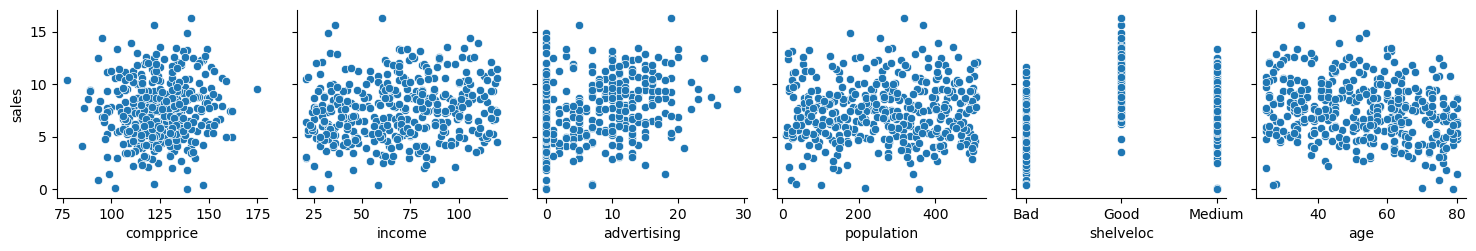

In [5]:
sns.pairplot(carseats_df,
             y_vars = ['sales'],
             x_vars = ['compprice', 'income', 'advertising', 'population', 'shelveloc', 'age'])

3. Fit a simple linear regression with sales as dependent and price as independent variable using statsmodel OLS. 

In [6]:
import statsmodels.api as sm

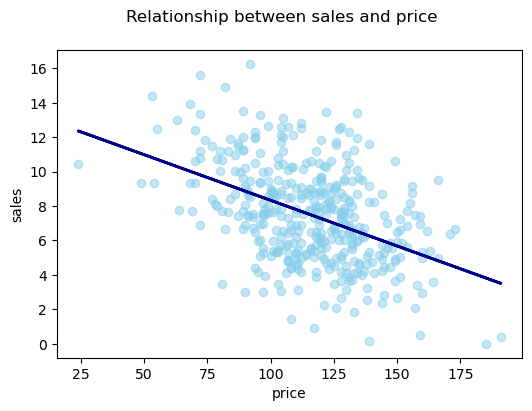

In [7]:
X = carseats_df[['price']]      # independent variable
y = carseats_df.sales           # dependent variable

X = sm.add_constant(X)          # OLS model needs an adjustable intercept, add column of 1s

model = sm.OLS(y, X)            # create an OLS model
model_results = model.fit()     # use data to calculate the intercept and slope

intercept, slope = model_results.params # storing the parameters in variables (intercept and slope)

#---

# plotting the results of the model
fig, ax = plt.subplots(figsize=(6, 4))

# values to calculate the regression line
x = carseats_df['price']
y = carseats_df['sales']

# add data points
ax.scatter(x, y, alpha=0.5, color='skyblue')
fig.suptitle('Relationship between sales and price')

# plotting the regression line with the help of calculated intercept and slope variables
ax.plot(x, x*slope+intercept, '-', color='darkblue', linewidth=2)
ax.set_xlabel('price')
ax.set_ylabel('sales');

4.a) Print out the model summary. 

In [8]:
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Thu, 23 May 2024   Prob (F-statistic):           7.62e-21
Time:                        09:43:56   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.000      12.398      14.886
price         -0.0531      0.005     -9.912      0.000      -0.064      -0.043
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.611
Skew:                           0.175   Prob(JB):                        0.271
Kurtosis:                       2.816   Cond. No.                         591.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4.b) What are the intercept and slope of your regression line?


In [9]:
print(f'intercept: {intercept}, slope: {slope}')

intercept: 13.64191517678092, slope: -0.053073018496316


4.c) Interpret the intercept and slope coefficients in terms the Carseats company would understand.

* **slope**: negative correlation between sales and price, that means the higher the price, the lower the sales
* **intercept**: where the x-axis is 0

5. Calculate and interpret the value of R_squared.  

In [10]:
model_results.rsquared

0.19798115021119456

6. What is the 95% confidence interval for the price?  

The true value for the price coefficient lies between -0.064 and -0.043 with a probability of 95%.

7. Is the price a significant predictor of the Carseat sales? Why or why not?

Price is a significant predictor, since the p-value ("P>|t|" in the OLS regression results summary) is below 0.05.  
This means, that the probability of getting this or more extreme values as result when the Null-hypothesis is true, is very low. So low, that you can reject the Null-hypothesis and accept the alternative hypothesis, that price is a significant predictor.

8. Use the least squares line to estimate the sales if the price of a carseat is 150$.   
Hint:  
model.predict(…)  
The values you want to predict need to be located in an array together with a constant.


In [11]:
y_pred = [1, 150]
model_results.predict(y_pred)[0]

5.6809624023335195